In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
import numpy as np

In [3]:
#process of loading data into juypter not book
df = pd.read_csv("C:/Users/Admin\Desktop/Natukwatsa Devis BIT006/diabetes_unclean.csv")
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [4]:
#checking columns of the dataset
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [5]:
#renaming the columns in the dataset
df.rename(columns={'ID':'Patients ID','No_Pation':'Number of Patients','Gender':'Sex','AGE':'Patient Age '},inplace=True)
df.head()

,Patients ID,Number of Patients,Sex,Patient Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [6]:
#checking for missing values
df.isnull().sum()

Patients ID           0
Number of Patients    0
Sex                   0
Patient Age           1
Urea                  1
Cr                    2
HbA1c                 3
Chol                  2
TG                    2
HDL                   1
LDL                   2
VLDL                  1
BMI                   0
CLASS                 0
dtype: int64

In [7]:
mean_value = df['HbA1c'].mean()
mean_value

8.284155069582505

In [8]:
#droping missing values
df.dropna(inplace=True)
df.isnull().sum()

Patients ID           0
Number of Patients    0
Sex                   0
Patient Age           0
Urea                  0
Cr                    0
HbA1c                 0
Chol                  0
TG                    0
HDL                   0
LDL                   0
VLDL                  0
BMI                   0
CLASS                 0
dtype: int64

In [9]:
#droping missing values
df.dropna(inplace=True)
df.isnull().sum()

Patients ID           0
Number of Patients    0
Sex                   0
Patient Age           0
Urea                  0
Cr                    0
HbA1c                 0
Chol                  0
TG                    0
HDL                   0
LDL                   0
VLDL                  0
BMI                   0
CLASS                 0
dtype: int64

In [10]:
#checking for class duplicates 
df.groupby('CLASS')['CLASS'].agg('count')

CLASS
N     102
N       1
P      53
Y     830
Y       8
Name: CLASS, dtype: int64

In [11]:
duplicates = df[df.duplicated()]

In [12]:
df['CLASS'].unique(

SyntaxError: incomplete input (4036626427.py, line 1)

In [13]:
df['CLASS'] = df['CLASS'].str.replace('N ','N')
df['CLASS'] = df['CLASS'].str.replace('Y ','Y')

In [14]:
df['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

In [15]:
#checking for sex duplicates 
df.groupby('Sex')['Sex'].agg('count')

Sex
F    430
M    562
f      2
Name: Sex, dtype: int64

In [16]:
df['Sex'].unique()

array(['F', 'M', 'f'], dtype=object)

In [21]:
array(['F', 'M', 'f'], dtype=object)

NameError: name 'array' is not defined

<Axes: >

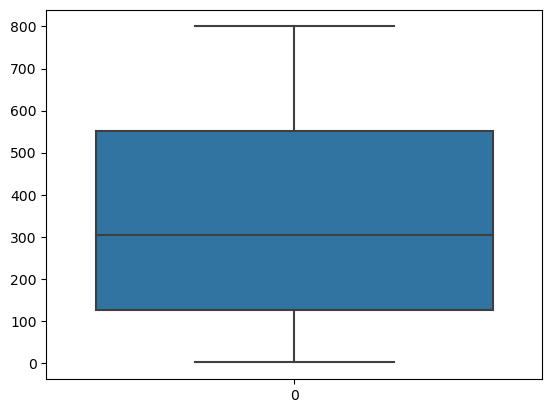

In [22]:
#checking for outliers
sns.boxplot(df['Patients ID'])

<Axes: >

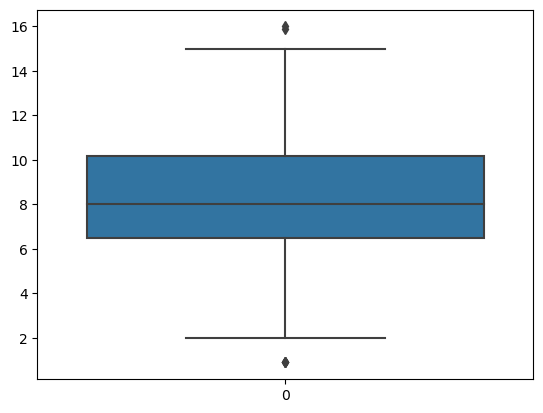

In [23]:
#checking for outliers of HbA1c
sns.boxplot(df['HbA1c'])

In [24]:
#removing outliers
max_HbA1c = df['HbA1c'].quantile(0.995)
max_HbA1c

14.703499999999996

In [25]:
df[df['HbA1c']<max_HbA1c]

,Patients ID,Number of Patients,Sex,Patient Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,185,454316,M,64.0,8.8,106.0,8.5,5.9,2.1,1.2,4.0,1.2,32.0,Y
1002,188,454316,F,75.0,10.3,113.0,8.6,4.2,1.6,0.9,2.6,0.7,32.0,Y
1003,189,454316,M,58.0,4.0,55.0,7.9,4.9,2.0,1.2,1.4,1.1,35.0,Y
1007,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y


In [26]:
df1=df[df['HbA1c']<max_HbA1c]
df1.head()

,Patients ID,Number of Patients,Sex,Patient Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


<Axes: >

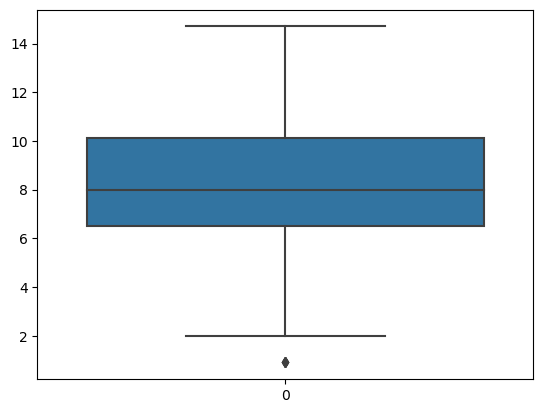

In [27]:
sns.boxplot(df1['HbA1c'])

In [28]:
#saving the work
df1.to_csv('Devis_clean_dataset.csv')

In [30]:
import pandas as pd
import base64
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [31]:
#loading the clean data set into the system
df1 = pd.read_csv("C:/Users/Admin\Desktop/Natukwatsa Devis BIT006/diabetes_unclean.csv")
df1.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [39]:
#showing data columns in the clean data set
df1.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

#selecting few data from the data set that to be used
df1=df1[['Unnamed: 0', 'Patients ID', 'Number of Patients', 'Sex', 'Patient Age ', 'Urea', 'Cr']]
df1.head()

In [40]:
#showing the data corrolation
import matplotlib.pyplot as plt
cor=df1.corr()
cor

C:\Users\Admin\AppData\Local\Temp\ipykernel_8376\3494850148.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df1.corr()


,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
ID,1.000000,0.064584,-0.072858,-0.095439,-0.102539,-0.008293,0.043999,-0.055433,0.026714,-0.064138,0.146575,0.047768
No_Pation,0.064584,1.000000,-0.088153,-0.018946,0.000853,-0.032219,-0.030054,-0.039816,-0.013493,-0.003245,0.113707,0.017736
AGE,-0.072858,-0.088153,1.000000,0.110137,0.057138,0.381044,0.036421,0.145743,-0.022627,0.014999,-0.090273,0.378948
Urea,-0.095439,-0.018946,0.110137,1.000000,0.624538,-0.024170,0.000775,0.039616,-0.037888,-0.004906,-0.011707,0.046344
Cr,-0.102539,0.000853,0.057138,0.624538,1.000000,-0.038256,-0.007121,0.056757,-0.024305,0.040659,0.009668,0.055041
HbA1c,-0.008293,-0.032219,0.381044,-0.024170,-0.038256,1.000000,0.178141,0.215808,0.030376,0.012253,0.072620,0.413166
Chol,0.043999,-0.030054,0.036421,0.000775,-0.007121,0.178141,1.000000,0.322149,0.103302,0.418649,0.076389,0.014214
TG,-0.055433,-0.039816,0.145743,0.039616,0.056757,0.215808,0.322149,1.000000,-0.082915,0.013799,0.145008,0.109107
HDL,0.026714,-0.013493,-0.022627,-0.037888,-0.024305,0.030376,0.103302,-0.082915,1.000000,-0.142102,-0.059097,0.072361
LDL,-0.064138,-0.003245,0.014999,-0.004906,0.040659,0.012253,0.418649,0.013799,-0.142102,1.000000,0.061649,-0.065525


<Axes: >

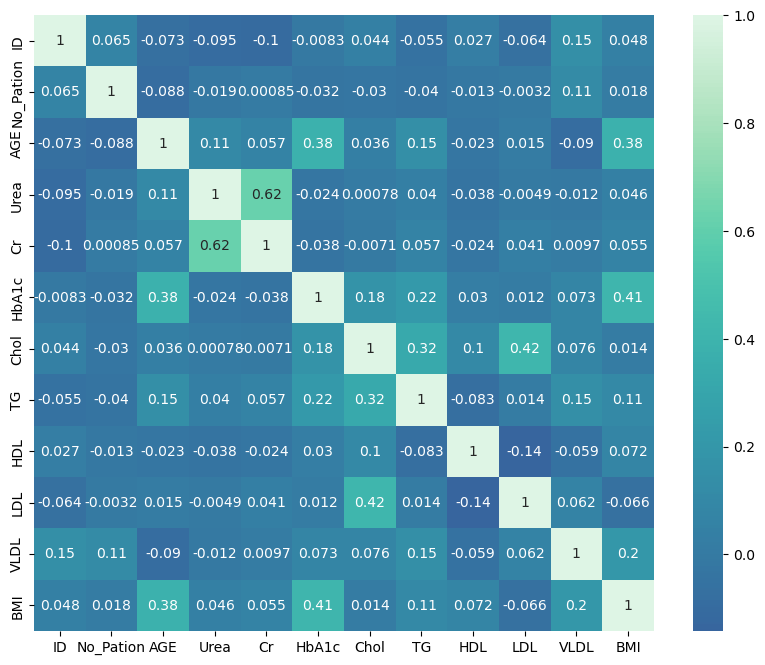

In [41]:
#showing the corrlation heatmap
import matplotlib.pyplot as plt

#increasing the corrolation size
plt.figure(figsize=(10,8))
sns.heatmap(data=cor, annot=True, cmap='mako', center=0)